In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import mordor as mo
import umap
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [ ]:
#to extract configs that vary in one parameter
#bc = confs.iloc[960][["conf","batch_size","lrn_rt","tr_weigth","l1_reg_term","l2_reg_term","dropout"]]
#t1 = (confs.loc[ (confs["dropout"]>0) & (confs["batch_size"]==bc[1]) & (confs["lrn_rt"] == bc[2]) & (confs["tr_weigth"]==bc[3]) & (confs["l1_reg_term"]==bc[4]) & (confs["l2_reg_term"]==bc[4] )]["conf"])
#test_scores.loc[(test_scores["conf"].isin(t1))].loc[test_scores["run"]==3].sort_values(["mcc","roc_auc","pr_auc","bce"],ascending=[True,True,True,False]).tail(10)

In the following cell , the path to the configuration file is set and the val and test scores df are set up and all directories are set to the current experiment defined by the variable cnfs

In [4]:
cnfs = "ccle_p-"

conf_path = "/home/debian/Mordor/experiments/configs/all_configs/"+cnfs

confs = pd.read_csv(conf_path,sep=" ",header = None)

confs.columns = ["bash","wrapper","task","expr_tv_pth","cna_tv_pth","mut_tv_pth","rsp_tv_pth","expr_tst_pth","cna_tst_pth","mut_tst_pth","rsp_tst_pth","hist_pth","pred_pth","emb_pth","epochs","batch_size","lrn_rt","tr_weigth","scope","feat_select","integration","mining","RoP_fct","RoP_ptc","RoP_m_lr","ES_min_dlt","ES_ptc","ovs","squared","l1_reg_term","l2_reg_term","gamma","c_loss","dropout","source","conf"]

val_scores = pd.DataFrame(columns=["acc","pr","rc","mcc","bce","roc_auc","pr_auc","dominance","sign","tpr","tnr","run","conf"])
test_scores = pd.DataFrame(columns=["acc","pr","rc","mcc","bce","roc_auc","pr_auc","dominance","sign","tpr","tnr","run","conf"])

grid_res_folder = "/home/debian/Mordor/experiments/"+cnfs+"/results/"

hist_folder = grid_res_folder+"histories/"
pred_folder = grid_res_folder+"predictions/"
emb_folder = grid_res_folder+"embeddings/"

n_files = (len(confs))

The following cell calculates the scores for all models of the current experiment and saves them to val_scores and test_scores df's

In [ ]:
for i in range(n_files):
    
    if i%100==0:
        complete= float(i)/float(n_files)
        print(complete)        
    
    for j in range(5):
        
        pred_t = pred_folder+"pred_test_"+str(i)+"_run_"+str(j+1)
        pred_v = pred_folder+"pred_val_"+str(i)+"_run_"+str(j+1)
        #conf = "conf_"+str(i)+"_run_"+str(j+1)
        val_scores.loc[val_scores.shape[0]] = mo.model.utils.get_scores(pred_v)
        test_scores.loc[test_scores.shape[0]] = mo.model.utils.get_scores(pred_t)

val_scores[["tr_weigth","l1_reg_term","l2_reg_term","dropout","lrn_rt","gamma","batch_size"]] = "na"

for index in val_scores.index:
    val_scores.at[index,["tr_weigth","l1_reg_term","l2_reg_term","dropout","lrn_rt","gamma","batch_size"]] = confs.loc[int(val_scores.at[index,"conf"])][["tr_weigth","l1_reg_term","l2_reg_term","dropout","lrn_rt","gamma","batch_size"]]

val_scores.to_csv(grid_res_folder+"val_scores_"+cnfs+".csv")
test_scores.to_csv(grid_res_folder+"test_scores_"+cnfs+".csv")
        

this next cell is meant to be used when val_scores and test_scores have already been saved to file and the previous cell is skipped . 
It also replaces -2 in the mcc column with 0 as mentioned in the methods section in the thesis

In [5]:
val_scores = pd.read_csv(grid_res_folder+"val_scores_"+cnfs+".csv",index_col = 0)
test_scores = pd.read_csv(grid_res_folder+"test_scores_"+cnfs+".csv",index_col = 0)
val_scores["mcc"] = val_scores["mcc"].replace(-2,0)
test_scores["mcc"] = test_scores["mcc"].replace(-2,0)

In [6]:
val_scores = val_scores.sort_values(["mcc","roc_auc","pr_auc","bce"],ascending=[True,True,True,False])
val_scores.tail(20)

,acc,pr,rc,mcc,bce,roc_auc,pr_auc,dominance,sign,tpr,tnr,run,conf,tr_weigth,l1_reg_term,l2_reg_term,dropout,lrn_rt,gamma,batch_size
871,0.894737,-2,0.0,0,0.355531,0.830882,0.428251,1.0,-1.0,0.0,1.0,2,174,0.1,0.0001,0.0001,0.0,0.0100,0.5,32
6126,0.894737,-2,0.0,0,0.434398,0.830882,0.435714,1.0,-1.0,0.0,1.0,2,1225,1.0,0.0001,0.0000,0.0,0.0100,1.0,64
506,0.894737,-2,0.0,0,0.461733,0.830882,0.782942,1.0,-1.0,0.0,1.0,2,101,0.5,0.0100,0.0000,0.0,0.0100,2.0,32
9440,0.894737,-2,0.0,0,0.354641,0.834559,0.428139,1.0,-1.0,0.0,1.0,1,1888,1.0,0.0100,0.0100,0.0,0.0005,1.0,64
6143,0.894737,-2,0.0,0,0.353354,0.834559,0.238393,1.0,-1.0,0.0,1.0,4,1228,1.0,0.0001,0.0001,0.0,0.0100,1.0,64
7240,0.894737,-2,0.0,0,0.587303,0.838235,0.633333,1.0,-1.0,0.0,1.0,1,1448,0.5,0.0001,0.0100,0.2,0.0010,2.0,64
1276,0.894737,-2,0.0,0,0.355012,0.841912,0.237798,1.0,-1.0,0.0,1.0,2,255,1.0,0.0001,0.0001,0.0,0.0100,0.5,32
8210,0.894737,-2,0.0,0,0.353547,0.841912,0.437150,1.0,-1.0,0.0,1.0,1,1642,0.0,0.0100,0.0001,0.0,0.0005,1.0,64
3775,0.894737,-2,0.0,0,0.461167,0.845588,0.289754,1.0,-1.0,0.0,1.0,1,755,0.5,0.0100,0.0100,0.0,0.0005,2.0,32
4911,0.894737,-2,0.0,0,0.391106,0.845588,0.350721,1.0,-1.0,0.0,1.0,2,982,0.0,0.0001,0.0000,0.0,0.0100,1.0,64


the next 4 cells serve to extract the configurations and scores given in the results tables in the thesis.

In [15]:
bestt = 825
rnt = 1
best0 = 659
rn0 = 1


In [16]:
confs.iloc[[bestt,best0]][[ 'tr_weigth',"gamma", 'l1_reg_term', 'l2_reg_term', 'dropout','lrn_rt',"batch_size","integration","feat_select"
       ]]

,tr_weigth,gamma,l1_reg_term,l2_reg_term,dropout,lrn_rt,batch_size,integration,feat_select
825,0.1,0.5,0.0001,0.01,0.0,0.0005,32,late,False
659,0.0,2.0,0.0001,0.00,0.0,0.0005,32,late,False


In [17]:
val_scores.loc[((val_scores["conf"]==bestt) & (val_scores["run"]==rnt)) | ((val_scores["conf"]==best0) & (val_scores["run"]==rn0))]

,acc,pr,rc,mcc,bce,roc_auc,pr_auc,dominance,sign,tpr,tnr,run,conf,tr_weigth,l1_reg_term,l2_reg_term,dropout,lrn_rt,gamma,batch_size
3295,0.894737,-2,0.0,0,0.474081,0.897059,0.593452,1.0,-1.0,0.0,1.0,1,659,0.0,0.0001,0.00,0.0,0.0005,2.0,32
4125,0.894737,-2,0.0,0,0.497955,0.941176,0.624405,1.0,-1.0,0.0,1.0,1,825,0.1,0.0001,0.01,0.0,0.0005,0.5,32


In [18]:
test_scores.loc[((test_scores["conf"]==bestt) & (test_scores["run"]==rnt)) | ((test_scores["conf"]==best0) & (test_scores["run"]==rn0))]

,acc,pr,rc,mcc,bce,roc_auc,pr_auc,dominance,sign,tpr,tnr,run,conf
3295,0.893617,-2.0,0.0,0.0,0.480123,0.654762,0.135923,1.0,-1.0,0.0,1.0,1,659
4125,0.893617,-2.0,0.0,0.0,0.504080,0.657143,0.309877,1.0,-1.0,0.0,1.0,1,825


for the visualization of models, the next cell needs to be set manually to the models configuration and run 

In [7]:
best_config = 825
rn = 1
run = 1
model = "bestT"

loss history visualization for late integration

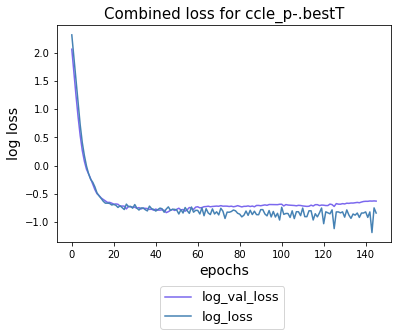

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
res = pd.read_csv(hist_folder+"history_"+str(best_config)+"_run_"+str(rn)+".csv").drop(columns=["Unnamed: 0"])
res.columns = ['loss','triplet_loss','classifier_loss', 'val_loss','val_triplet_loss','val_classifier_loss', 'lr'] 
res["log_val_loss"]=np.log(res["val_loss"]) 
res["log_val_triplet_loss"]=np.log(res["val_triplet_loss"]) 
res["log_val_classifier_loss"]=np.log(res["val_classifier_loss"]) 
res["log_loss"]=np.log(res["loss"]) 
res["log_triplet_loss"]=np.log(res["triplet_loss"]) 
res["log_classifier_loss"]=np.log(res["classifier_loss"]) 
res["epoch"] = res.index

ax = plt.gca() 

res.plot(kind='line',x='epoch',y='log_val_loss', color='mediumslateblue', ax=ax) 
res.plot(kind='line',x='epoch',y='log_loss',color='steelblue',ax=ax) 
plt.xlabel("epochs",fontsize=14)
plt.ylabel("log loss", fontsize=14)
plt.title("Combined loss for "+cnfs+"."+model,fontsize=15) 
#plt.title("Combined loss for sqAH.compare",fontsize=15)
plt.legend(bbox_to_anchor=(0.7,-0.17),fontsize=13)
plt.show()

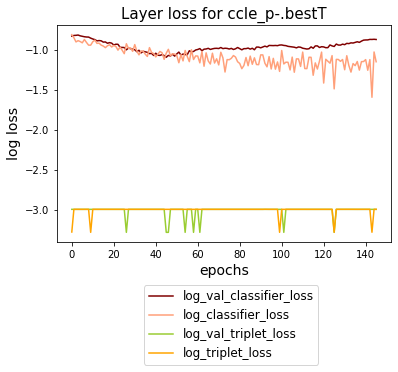

In [9]:
ax = plt.gca()

res.plot(kind='line',x='epoch',y='log_val_classifier_loss', color='maroon', ax=ax)
res.plot(kind='line',x='epoch',y='log_classifier_loss', color='lightsalmon', ax=ax)
res.plot(kind='line',x='epoch',y='log_val_triplet_loss', color='yellowgreen', ax=ax)
res.plot(kind='line',x='epoch',y='log_triplet_loss', color='orange', ax=ax)
plt.title("Layer loss for "+cnfs+"."+model,fontsize=15) 
plt.xlabel("epochs",fontsize=14)
plt.ylabel("log loss", fontsize=14)
plt.legend(bbox_to_anchor=(0.8,-0.17),fontsize=12)

plt.show()

loss history visualization for early integration

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
res = pd.read_csv(hist_folder+"history_"+str(best_config)+"_run_"+str(run)+".csv").drop(columns=["Unnamed: 0"])
res.columns = ['loss','expression_loss','cna_loss','mutation_loss','classifier_loss', 'val_loss','val_expression_loss','val_cna_loss','val_mutation_loss','val_classifier_loss', 'lr'] 

res["log_val_loss"]=np.log(res["val_loss"]) 
res["log_val_expression_loss"]=np.log(res["val_expression_loss"])
res["log_val_cna_loss"]=np.log(res["val_cna_loss"])
res["log_val_mutation_loss"]=np.log(res["val_mutation_loss"])
res["log_val_classifier_loss"]=np.log(res["val_classifier_loss"]) 
res["log_loss"]=np.log(res["loss"]) 
res["log_expression_loss"]=np.log(res["expression_loss"])
res["log_cna_loss"]=np.log(res["cna_loss"]) 
res["log_mutation_loss"]=np.log(res["mutation_loss"]) 
res["log_classifier_loss"]=np.log(res["classifier_loss"]) 
res["epoch"] = res.index

ax = plt.gca() 

res.plot(kind='line',x='epoch',y='log_val_loss', color='mediumslateblue', ax=ax) 
res.plot(kind='line',x='epoch',y='log_loss',color='steelblue',ax=ax) 
plt.xlabel("epochs",fontsize=14)
plt.ylabel("log loss", fontsize=14)
plt.title("Combined loss for "+cnfs+"."+model,fontsize=15)
#plt.title("Combined loss for A2.960.3")
plt.legend(bbox_to_anchor=(0.7,-0.17))
plt.show()

In [ ]:
ax = plt.gca()

res.plot(kind='line',x='epoch',y='log_val_classifier_loss', color='maroon', ax=ax)
res.plot(kind='line',x='epoch',y='log_classifier_loss', color='lightsalmon', ax=ax)
res.plot(kind='line',x='epoch',y='log_val_expression_loss', color='yellowgreen', ax=ax)
res.plot(kind='line',x='epoch',y='log_expression_loss', color='orange', ax=ax)
res.plot(kind='line',x='epoch',y='log_mutation_loss', color='cyan', ax=ax) 
res.plot(kind='line',x='epoch',y='log_val_mutation_loss',color='teal',ax=ax) 
res.plot(kind='line',x='epoch',y='log_cna_loss', color='darkmagenta', ax=ax) 
res.plot(kind='line',x='epoch',y='log_val_cna_loss',color='springgreen',ax=ax)
plt.xlabel("epochs",fontsize=14)
plt.ylabel("log loss", fontsize=14)
plt.title("Classifier Loss for "+cnfs+"."+model,fontsize=15)
plt.legend(bbox_to_anchor=(0.8,-0.17))
#plt.ylim(-2.5,-3.05)
#plt.gca().invert_yaxis()
plt.show()

Prediction visualization

(0.0, 1.1)

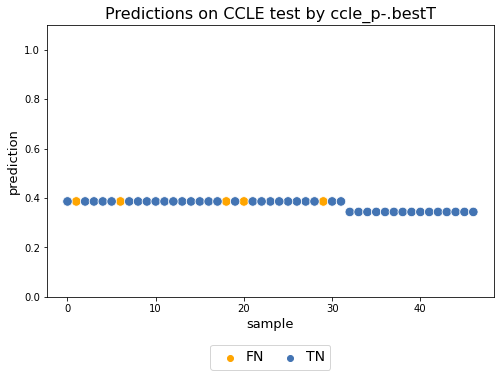

In [16]:
val = pd.read_csv(pred_folder+"pred_test_"+str(best_config)+"_run_"+str(run)) 
val = val.sort_values("metric")
c_dict = {"TP":"#86B049","FP":"#B8293D","TN":"#4374B3","FN":"#FFA500"}
conf_m_e = sorted(list(set(val["metric"])))

colors = []
for i in range(len(conf_m_e)):
    color = c_dict[conf_m_e[i]]
    colors.append(color)

plt.figure(figsize = (8,5))
sns.set_palette(sns.color_palette(colors))
p = sns.scatterplot(x="smpl", y='pred', hue='metric', s=90, data=val)
#sns.scatterplot(x="smpl", y='pred', hue='metric', s=90, data=val).set(title="Predictions on GDSC val by A4.928.4")
p.set_xlabel("sample", fontsize = 13)
p.set_ylabel("prediction", fontsize = 13)
p.set_title("Predictions on CCLE test by "+cnfs+"."+model, fontsize = 16)
#p.set_title("Predictions on GDSC val by sqBLA.bestT", fontsize = 16)

if len(colors) == 2:
    plt.legend(handletextpad=0.1,mode="expand",ncol=2,bbox_to_anchor=(0.35, -0.55,0.3,0.4),fontsize=14)
if len(colors) == 3:
    plt.legend(handletextpad=0.05,mode="expand",ncol=3,bbox_to_anchor=(0.28, -0.3,0.4,0.13),fontsize=14)
if len(colors) == 4:
    plt.legend(handletextpad=0.05,mode="expand",ncol=4,bbox_to_anchor=(0.215, -0.3,0.52,0.13),fontsize=14)
plt.ylim(0, 1.1)

CCLE Embedding visualization preprocessing

In [17]:
ccle_rsp = pd.read_csv("/home/debian/Mordor/depmap/data/base/dl_data/CCLE_response.Paclitaxel.tsv",sep="\t",index_col=0)
ccle_bin_rsp = pd.DataFrame(ccle_rsp["response"])
ccle_bin_rsp["response"] = 0

# response binarization loop
for sample in ccle_rsp.index:
    if ccle_rsp.at[sample,"response"] == "S":
        ccle_bin_rsp.at[sample,"response"] = 1
    else:
        ccle_bin_rsp.at[sample,"response"] = 0

ccle_rsp["bin"] = ccle_bin_rsp["response"]
ccle_bin_rsp.columns = ["rsp"] 

r_samples_index= ccle_bin_rsp.loc[ccle_bin_rsp["rsp"]==0].index
s_samples_index= ccle_bin_rsp.loc[ccle_bin_rsp["rsp"]==1].index
                
n_s_smpl_tst = len(s_samples_index) - int(len(s_samples_index)*0.8) # nmbr val smpl, possibly here one could introduce a variable to change train/vall split ratio
n_r_smpl_tst = len(r_samples_index) - int(len(r_samples_index)*0.8)
np.random.seed(13)  # this is to make sure the "same random split" is generated all times to compare models
tst_split_s = np.random.choice(a=s_samples_index, size=n_s_smpl_tst,replace=False)
np.random.seed(13) 
tst_split_r = np.random.choice(a=r_samples_index, size=n_r_smpl_tst,replace=False)

val = pd.read_csv(pred_folder+"pred_test_"+str(best_config)+"_run_"+str(run))
rsp = pd.read_csv("/home/debian/Mordor/depmap/data/base/dl_data/CCLE_response.Paclitaxel.tsv",sep="\t")

with open(emb_folder+"emb_test_"+str(best_config)+"_run_"+str(run), 'rb') as pickle_file: #+str(best_config)+"+str(run)
    embedding = pickle.load(pickle_file)

umap_embedding = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0).fit_transform(embedding)

plt_df = pd.DataFrame([umap_embedding[:, 0], umap_embedding[:, 1]],index=None).T
plt_df.columns = ["x","y"]
plt_df[["CCLE_name","response","logIC50"]]="na"

for item in plt_df.index:
    name = val.loc[item]["CCLE_name"]
    response = rsp.loc[rsp["CCLE_name"]==name]["response"].values[0]
    ic50 = rsp.loc[rsp["CCLE_name"]==name]["logIC50"].values[0]
    
    plt_df.at[item,["CCLE_name","response","logIC50"]]=[name,response,ic50]


PDX Embedding visualization preprocessing

In [26]:
val = pd.read_csv(pred_folder+"pred_test_"+str(best_config)+"_run_"+str(run))
import pickle

with open(emb_folder+"emb_test_"+str(best_config)+"_run_"+str(run), 'rb') as pickle_file: #+str(best_config)+"+str(run)
    embedding = pickle.load(pickle_file)

umap_embedding = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0).fit_transform(embedding)

# pdx embedding visualization
plt_df = pd.DataFrame([umap_embedding[:, 0], umap_embedding[:, 1]],index=None).T
plt_df.columns = ["x","y"]
plt_df["position"] = val["smpl"]
rsp = pd.read_csv("/home/debian/Mordor/depmap/data/base/dl_data/response/PDX_response.Paclitaxel.tsv",sep="\t")

rsp.index = range(len(rsp))
sliced = rsp.loc[plt_df["position"]]
sliced.index = range(len(sliced))
plt_df["response"] = sliced["response"]

sliced = rsp.loc[plt_df["position"]]
sliced.index = range(len(sliced))
plt_df["response"] = sliced["response"]

for sample in plt_df.index:
    if plt_df.at[sample,"response"] == "S":
        plt_df.at[sample,"response"] = 1
    else:
        plt_df.at[sample,"response"] = 0

Embedding visualization

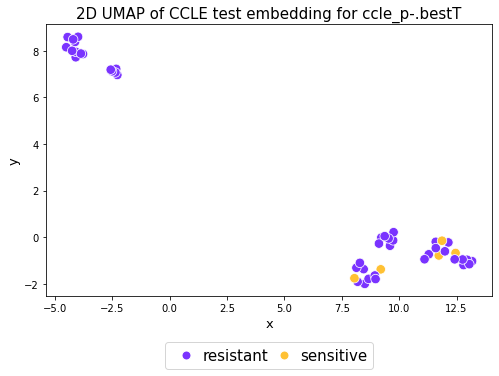

In [18]:
colors = ["#7A33FF","#FFC133"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize = (8,5))
#sns.scatterplot(x="x", y='y', hue='response', s=90, data=plt_df).set(title="2D UMAP of PDX embedding for "+array+gs+str(best_config)+r+" (best "+metric+")")
p = sns.scatterplot(x="x", y='y', hue='response', s=90, data=plt_df)
p.set_xlabel("x", fontsize = 13)
p.set_ylabel("y", fontsize = 13)
p.set_title("2D UMAP of CCLE test embedding for "+cnfs+"."+model, fontsize = 15)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='resistant',markerfacecolor="#7A33FF", markersize=9), 
                   Line2D([0], [0], marker='o', color='w', label='sensitive',markerfacecolor="#FFC133", markersize=9)]

plt.legend(handles=legend_elements,handletextpad=0.1,mode="expand",ncol=2,bbox_to_anchor=(0.25, -0.27,0.5,0.13),fontsize=15)

Prediction Confidence bar chart preprocessing

In [605]:
import pandas as pd
test_sample_pred_values = pd.DataFrame()

for i in range(n_files):
    
    if i%100==0:
        complete= float(i)/float(n_files)
        print(complete)        
    
    for j in range(5):
        
        pred = pd.read_csv(pred_folder+"pred_test_"+str(i)+"_run_"+str(j+1))
        conf = "conf_"+str(i)+"_run_"+str(j+1)
        test_sample_pred_values[conf] = pred["pred"]
        test_sample_pred_values[conf] 
    
test_sample_pred_values = test_sample_pred_values.T
test_sample_pred_values["run"]="na"
for index in test_sample_pred_values.index:
    run = "run_"+index.split("_")[3]
    test_sample_pred_values.at[index, 'run'] = run
    
test_sample_pred_values.to_csv(grid_res_folder+"test_sample_pred_val.csv")

0.0


/tmp/ipykernel_1789580/1729099679.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  test_sample_pred_values[conf] = pred["pred"]


0.051440329218107
0.102880658436214
0.15432098765432098
0.205761316872428
0.257201646090535
0.30864197530864196
0.360082304526749
0.411522633744856
0.46296296296296297
0.51440329218107
0.565843621399177
0.6172839506172839
0.668724279835391
0.720164609053498
0.7716049382716049
0.823045267489712
0.8744855967078189
0.9259259259259259
0.977366255144033


In [22]:
test_sample_pred_values = pd.read_csv(grid_res_folder+"test_sample_pred_val_"+cnfs+".csv",index_col=0)

# it is inconsequential which prediction file is chosen here, as it only serves to label the x-axis ticks 
#mapping the sample numbers to their response class
pred= pd.read_csv("/home/debian/Mordor/experiments/"+cnfs+"/results/predictions/pred_test_825_run_1")


In [24]:
import pandas as pd

def percentage(amount,total):
    
          
    try:
        out = float(amount)/float(total)
    except ZeroDivisionError:
        out = 0

    return out

test_scores = pd.read_csv(grid_res_folder+"test_scores_"+cnfs+".csv")

best_model_runs = pd.DataFrame(columns=test_scores.columns)

for config in confs["conf"]:
    cur_model = test_scores.loc[test_scores["conf"]==config].sort_values(["mcc","roc_auc","pr_auc","bce"],ascending=[True,True,True,False]).tail(1)
    best_model_runs = pd.concat([best_model_runs,cur_model])

smpls_str = list(test_sample_pred_values.columns)
smpls_str.remove('run')

smpls_int = []
for s in smpls_str:
    smpls_int.append(int(s))
    
confidence_counts = []
for sample in smpls_int:
    confidence_counts.append([0,0,0,0,0,0])
test = 0    
for conf,run in zip(best_model_runs["conf"],best_model_runs["run"]):
    
    for sample in smpls_int:
        t = 0
        f = 0
        cl = pred.loc[sample]["truth"]
        pr = test_sample_pred_values.loc["conf_"+str(conf)+"_run_"+str(run)][sample]
        
        if cl == 1:  #sensitive sample
            
            if pr >= 0.5:  #predicted as sensitive
                if pr > 0.8:         # high confidence prediction 
                    confidence_counts[sample][0] = confidence_counts[sample][0]+1
                elif (pr < 0.8) & (pr >= 0.6):     # medium confidence prediction
                    confidence_counts[sample][1] = confidence_counts[sample][1]+1
                else: # low confidence prediction
                    confidence_counts[sample][2] = confidence_counts[sample][2]+1
            else: #predicted as resistant
                if pr > 0.4: # low confidence prediction
                    confidence_counts[sample][3] = confidence_counts[sample][3]+1
                elif (pr <= 0.4) & (pr > 0.2): # medium confidence prediction
                    confidence_counts[sample][4] = confidence_counts[sample][4]+1
                else: #high confidence prediction
                    confidence_counts[sample][5] = confidence_counts[sample][5]+1
        
        if cl == 0: # resistant class
             
            if pr >= 0.5:  #predicted as sensitive
                if pr > 0.8:         # high confidence prediction 
                    confidence_counts[sample][0] = confidence_counts[sample][0]+1
                elif (pr < 0.8) & (pr >= 0.6):     # medium confidence prediction
                    confidence_counts[sample][1] = confidence_counts[sample][1]+1
                else: # low confidence prediction
                    confidence_counts[sample][2] = confidence_counts[sample][2]+1
            else: #predicted as resistant
                if pr > 0.4: # low confidence prediction
                    confidence_counts[sample][3] = confidence_counts[sample][3]+1
                elif (pr <= 0.4) & (pr > 0.2): # medium confidence prediction
                    confidence_counts[sample][4] = confidence_counts[sample][4]+1
                else: #high confidence prediction
                    confidence_counts[sample][5] = confidence_counts[sample][5]+1
           
        
    
    

confidence_ratio = []
total = len(best_model_runs)
for sample in smpls_int:
    
    s_hi = percentage(confidence_counts[sample][0],total)
    s_med = percentage(confidence_counts[sample][1],total)
    s_low = percentage(confidence_counts[sample][2],total)
    r_low = percentage(confidence_counts[sample][3],total)
    r_med = percentage(confidence_counts[sample][4],total)
    r_hi = percentage(confidence_counts[sample][5],total)
    
    
    confidence_ratio.append([s_hi,s_med,s_low,r_low,r_med,r_hi])
        

conf = pd.DataFrame(columns=smpls_int)

for sample in smpls_int:
    conf[sample]=confidence_ratio[sample]
#test = conf.T.sort_values()
conf.index = ["s high","s medium","s low","r low","r medium","r high"]


In [25]:
print("done")

done


In [26]:
conf = conf.T
conf["label"] = "na"
conf
i = 0
for sample in smpls_int:
    
    if pred.at[sample, 'truth'] == 0:
        conf.at[sample,"label"]=str(i)+"\nR"
    else: 
        conf.at[sample,"label"]=str(i)+"\nS"
    i = i+1
conf = conf.sort_values(["s high","s medium","s low","r high","r medium","r low"],ascending=[False,False,False,False,False,False])
conf = conf.reset_index()
conf["rank"] = range(len(conf))

x_label = conf["label"]
x_l_label = list(conf["label"])

x_label = conf["label"]
conf = conf.T

/tmp/ipykernel_1825189/2212380881.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x_label)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


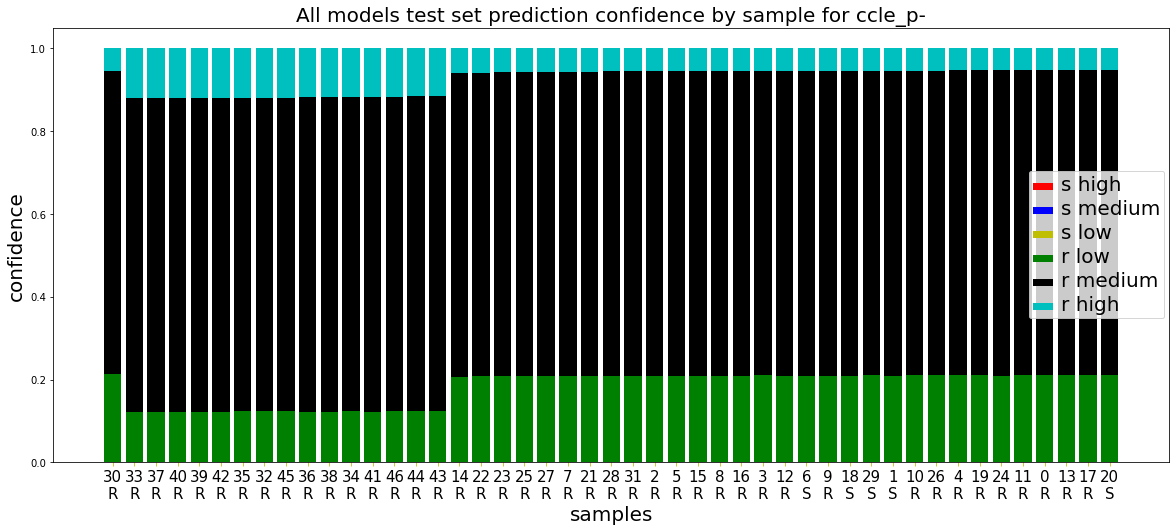

In [27]:
rank = conf.loc["rank"]
y1 = conf.loc["s high"].to_numpy()
y2 = conf.loc["s medium"].to_numpy()
y3 = conf.loc["s low"].to_numpy()
y4 = conf.loc["r low"].to_numpy()
y5 = conf.loc["r medium"].to_numpy()
y6 = conf.loc["r high"].to_numpy()

plt.figure(figsize=(20.0,8.0))
plt.bar(rank, y1, color='r')
plt.bar(rank, y2, bottom=y1, color='b')
plt.bar(rank, y3, bottom=y1+y2, color='y')
plt.bar(rank, y4, bottom=y1+y2+y3, color='g')
plt.bar(rank, y5, bottom=y1+y2+y3+y4, color='k')
plt.bar(rank, y6, bottom=y1+y2+y3+y4+y5, color='c')
plt.xlabel("samples",fontsize=20)
plt.ylabel("confidence",fontsize=20)
plt.gca().set_xticklabels(x_label)
plt.gca().set_xticks(range(len(x_label)))
#colors = [color_dict[x] for x in conf.T["label"]]
plt.gca().tick_params(axis="x",color='y')
plt.xticks(fontsize=15)
plt.legend()
plt.legend(["s high","s medium","s low","r low","r medium","r high"])
plt.title("All models test set prediction confidence by sample for "+cnfs,fontsize=20)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') 
plt.show()
